In [2]:
from openai import OpenAI
from base64 import b64decode
import pandas as pd
import matplotlib.pyplot as plt
import io
import json
from dotenv import load_dotenv

Matplotlib is building the font cache; this may take a moment.


In [3]:
load_dotenv()
client = OpenAI()

In [4]:
def chat_completion(prompt, model="gpt-4o-mini", temperature=0, response_format=None):
    res = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature,
        response_format=response_format 
    )

    return res.choices[0].message.content

In [5]:
l_sector = [
   '식료품점', '레스토랑', '패스트푸드점', '약국',
   '주유소', '전자제품 매장', '택시 서비스'
]
l_city = ['브뤼셀', '파리', '부줌부라', '베를린', '산티아고'] 
l_size = ['소규모', '중규모', '대규모']

f_prompt = """
역할: 당신은 다이렉트 마케팅 분야에서 풍부한 경험을 가진 전문 콘텐츠 작성자입니다.
뛰어난 작문 능력, 창의성, 다양한 톤과 스타일에 대한 적응력,
효과적인 다이렉트 캠페인을 위한 고객 니즈와 선호도에 대한 깊은 이해를 보유하고 있습니다.

컨텍스트: 새로운 이커머스 결제 서비스를 상점에 판매하기 위한 
다이렉트 마케팅 캠페인용 짧은 메시지를 2문장 이내로 작성해야 합니다. 
대상 상점들은 다음 세 가지 특성을 가지고 있습니다.
- 업종: {sector}
- 상점 위치(도시): {city}
- 상점 규모: {size}

작업: 다이렉트 마케팅 캠페인을 위한 짧은 메시지를 작성하세요.
정의된 역할의 능력을 활용하여 이 메시지를 작성하세요!
판매하고자 하는 제품과 메시지를 받을 상점의 특성을 고려하여 메시지를 작성하는 것이 중요합니다.
"""

f_sub_prompt = "{sector}, {city}, {size}"

In [6]:
nb_rep = 3

In [7]:
res = []
for sector in l_sector:
    for city in l_city:
        for size in l_size:
            for i in range(nb_rep):  # 'nb_rep' times each example
                prompt = f_prompt.format(
                sector=sector, city=city, size=size)
                sub_prompt = f_sub_prompt.format(
                sector=sector, city=city, size=size)
                response_txt = chat_completion(
                    prompt, model='gpt-4o-mini', temperature=1
                )
                response_txt = response_txt.replace('"', '')
                print(response_txt)
                
                new_row = {
                    'prompt': sub_prompt,
                    'completion': response_txt
                }

                new_row = {
                    'messages':[
                        {
                            'role': 'user', 
                            'content': sub_prompt
                        },
                        {
                            'role': 'assistant', 
                            'content': response_txt
                        }
                    ]
                }
                
                res.append(new_row)

브뤼셀의 소규모 식료품점에 최적화된 간편한 결제 서비스로 고객의 쇼핑 경험을 혁신하세요! 클릭 한 번으로 더 많은 판매와 고객 충성도를 확보할 수 있습니다.
브뤼셀의 소규모 식료품점에도 더 쉽고 빠른 결제 경험을 제공하세요! 저희의 신규 이커머스 결제 서비스로 고객 만족도를 높이고, 매출을 증가시키는 기회를 놓치지 마세요!
브뤼셀의 소규모 식료품점에 최적화된 새로운 결제 서비스로 고객의 쇼핑 경험을 한층 더 간편하게 변화시켜 보세요! 간단한 도입으로 더 많은 고객 유치와 매출 증가를 실현할 수 있습니다.
브뤼셀의 중규모 식료품점에 최적화된 결제 솔루션으로 고객의 쇼핑 경험을 혁신하세요! 간편하고 빠른 결제로 당신의 매출을 끌어올리는 기회를 놓치지 마세요!
브뤼셀의 중규모 식료품점에 맞춤형 결제 솔루션을 도입해 고객의 쇼핑 경험을 혁신하세요! 더 빠르고 안전한 결제로 매출을 높이고, 고객의 신뢰를 쌓아보세요.
브뤼셀의 중규모 식료품점에 최적화된 결제 서비스를 도입해 고객의 쇼핑 경험을 혁신하세요! 간편한 결제 솔루션으로 매출을 증대시키고, 고객 만족을 극대화할 기회를 놓치지 마세요!
브뤼셀의 대규모 식료품점에 최적화된 이커머스 결제 서비스로 고객 편의를 극대화하세요! 간편하고 안전한 결제로 매출을 증가시키는 기회를 지금 바로 잡아보세요!
브뤼셀의 대규모 식료품점들을 위해 설계된 우리 이커머스 결제 서비스로 고객들의 쇼핑 경험을 혁신하세요! 간편하고 안전한 결제로 매출 상승과 고객 만족을 동시에 잡아보세요!
브뤼셀의 대규모 식료품점이시라면, 고객에게 더 원활한 쇼핑 경험을 제공할 시간입니다! 저희 새로운 이커머스 결제 서비스로 결제 과정을 혁신하고, 매출 증대의 기회를 놓치지 마세요!
식료품점을 위한 혁신적인 결제 솔루션! 파리의 소규모 상점에서도 손쉽고 안전하게 고객의 쇼핑 경험을 업그레이드하세요!
파리의 소규모 식료품점 여러분, 고객의 결제 경험을 혁신하세요! 우리의 이커머스 결제 서비스로 안전하고 간편한 쇼핑을 제공해 고객을 더 많이 끌어모으세요!
파리의 사

In [9]:
with open('training.jsonl', 'w', encoding='utf-8') as file:
    for entry in res:
        json_str = json.dumps(entry, ensure_ascii=False)
        file.write(json_str + '\n')

In [10]:
l_sector = ['꽃집', '장난감 가게', '피자 레스토랑']
l_city = ['로마', '뉴욕', '리우데자네이루'] 
l_size = ['소규모', '중규모', '대규모']

In [11]:
nb_rep = 1

In [12]:
res = []
for sector in l_sector:
    for city in l_city:
        for size in l_size:
            for i in range(nb_rep):  # 'nb_rep' times each example
                prompt = f_prompt.format(
                sector=sector, city=city, size=size)
                sub_prompt = f_sub_prompt.format(
                sector=sector, city=city, size=size)
                response_txt = chat_completion(
                    prompt, model='gpt-4o-mini', temperature=1
                )
                response_txt = response_txt.replace('"', '')
                print(response_txt)
                
                new_row = {
                    'prompt': sub_prompt,
                    'completion': response_txt
                }

                new_row = {
                    'messages':[
                        {
                            'role': 'user', 
                            'content': sub_prompt
                        },
                        {
                            'role': 'assistant', 
                            'content': response_txt
                        }
                    ]
                }
                
                res.append(new_row)

로마의 사랑스러운 꽃집, 소중한 고객을 위해 더욱 쉽게 결제를 받아보세요! 저희 이커머스 결제 서비스로 매출을 향상시키고, 꽃의 아름다움을 더 많은 사람들과 나누세요.
로마의 중소 꽃집을 위한 혁신적인 이커머스 결제 서비스로 고객의 꽃 주문을 더욱 간편하게 만들어보세요. 매출을 증대시키고, 행복한 순간들을 꽃으로 채우는 경험을 선사합니다!
로마의 대규모 꽃집을 위한 혁신적인 이커머스 결제 서비스로 고객의 쇼핑 경험을 한층 더 향상시키세요! 간편하고 안전한 결제로, 매출을 증가시키고 고객의 재방문율을 높일 수 있는 기회를 놓치지 마세요!
뉴욕의 소규모 꽃집을 위해 특별히 설계된 혁신적인 결제 서비스로, 고객의 꽃 구매 경험을 한층 더 매끄럽고 즐겁게 만들어 보세요! 지금 가입하시면 간편한 결제와 더불어 매출 증대의 기회를 누릴 수 있습니다.
뉴욕의 중규모 꽃집을 위한 맞춤형 이커머스 결제 서비스로 고객의 사랑을 더욱 깊게 만들어보세요! 간편한 결제로 매출을 높이고, 꽃을 통해 사랑과 감동을 전하는 여정을 함께하겠습니다.
뉴욕의 대규모 꽃집을 위한 혁신적인 결제 서비스로, 고객의 쇼핑 경험을 한층 더 향상시키세요! 간편하고 안전한 결제 솔루션으로 매출을 극대화하고, 사랑을 전하는 꽃들과 함께 여러분의 비즈니스를 성장시키는 기회를 놓치지 마세요!
리우의 사랑을 더욱 빛내줄 꽃집, 새로운 결제 서비스로 고객님들께 편리함을 선사하세요! 세심하게 디자인된 솔루션으로 매출을 높이고, 더 많은 꽃의 행복을 전해보세요!
리우데자네이루의 중규모 꽃집을 위해 특별히 설계된 이커머스 결제 서비스를 통해 고객의 꽃 구매 경험을 혁신하세요! 간편한 결제 시스템으로 매출을 올리고, 아름다움을 더하는 꽃을 더 많은 이들과 나누는 기회를 잡으세요!
리우데자네이루의 꽃집을 위한 혁신적인 결제 솔루션으로 고객 만족도를 높이세요! 간편한 결제 시스템이 대규모 상점 운영을 지원하여 판매 증가의 기회를 선사합니다.
장난감 가게를 운영하시는 선생님, 저희 새로운 이커머스 결제 서비스로 로마의 고객들에

In [13]:
with open('validation.jsonl', 'w', encoding='utf-8') as file:
    for entry in res:
        json_str = json.dumps(entry, ensure_ascii=False)
        file.write(json_str + '\n')

In [ ]:
tr_file = client.files.create(
    file=open('training.jsonl', 'rb'),
    purpose='fine-tune'
)

vl_file = client.files.create(
    file=open('validation.jsonl', 'rb'),
    purpose='fine-tune'
)

fine_tuning_job = client.fine_tuning.jobs.create(
    training_file=tr_file.id,
    validation_file=vl_file.id,
    model='gpt-4o-mini-2024-07-18'
)

In [25]:
client.fine_tuning.jobs.list_events(fine_tuning_job_id=fine_tuning_job.id)

SyncCursorPage[FineTuningJobEvent](data=[FineTuningJobEvent(id='ftevent-9Ky5fWXdmP83oHlZverUO9hB', created_at=1729748089, level='info', message='The job has successfully completed', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-qF5FO2d3Fwwz16vh5nroQa2D', created_at=1729748084, level='info', message='New fine-tuned model created', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-oyVGOfARCcD5oCkMGUhKPDcI', created_at=1729748084, level='info', message='Checkpoint created at step 630', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-8wFa0qb6BiExEM9VcvzC6mCm', created_at=1729748084, level='info', message='Checkpoint created at step 315', object='fine_tuning.job.event', data={}, type='message'), FineTuningJobEvent(id='ftevent-Stljy1mGSfnJtTlMf5oGcObD', created_at=1729748014, level='info', message='Step 945/945: training loss=0.42, full validation loss=0.64', object='fin

In [26]:
job = client.fine_tuning.jobs.retrieve(fine_tuning_job.id)
result_file = job.result_files[0]

In [27]:
content = client.files.content(result_file)

In [28]:
content_str = b64decode(content.read().decode('utf-8')).decode()
df = pd.read_csv(io.StringIO(content_str))

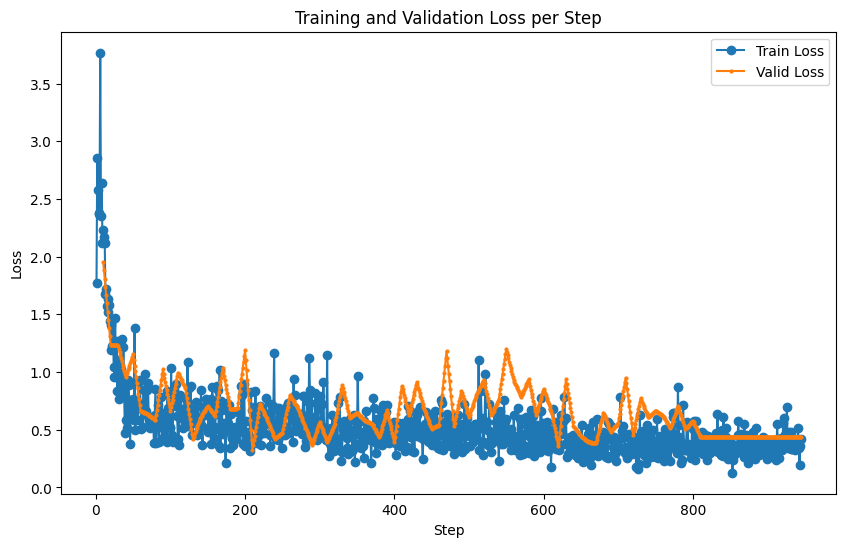

In [35]:
# For the NaN is 'valid_loss'
df['valid_loss_interpolated'] = df['valid_loss'].interpolate()
plt.figure(figsize=(10, 6))
plt.plot(df['step'], df['train_loss'], label='Train Loss', marker='o')
plt.plot(df['step'], df['valid_loss_interpolated'],
label='Valid Loss', marker='o', markersize=2)
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss per Step')
plt.legend()

In [37]:
completion = client.chat.completions.create(
    model='ft:gpt-4o-mini-2024-07-18:************',
    messages=[
        {'role': 'user', 'content': '동물병원, 라바트, 소규모'}
    ]
)

print(completion)
print(completion.choices[0].message.content)

ChatCompletion(id='chatcmpl-ALkyJAKLK0PP0J450fKMrRMr5V7eD', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='라바트의 소규모 동물병원에 최적화된 우리의 이커머스 결제 서비스로 수월한 결제 프로세스를 구현해보세요! 고객의 신뢰를 쌓고, 더 많은 반려동물 가족과 소통하는 기회를 놓치지 마세요.', refusal=None, role='assistant', function_call=None, tool_calls=None))], created=1729748811, model='ft:gpt-4o-mini-2024-07-18:hanbit-media::ALkmZ0jv', object='chat.completion', service_tier=None, system_fingerprint='fp_c05b983dba', usage=CompletionUsage(completion_tokens=66, prompt_tokens=19, total_tokens=85, prompt_tokens_details={'cached_tokens': 0}, completion_tokens_details={'reasoning_tokens': 0}))
라바트의 소규모 동물병원에 최적화된 우리의 이커머스 결제 서비스로 수월한 결제 프로세스를 구현해보세요! 고객의 신뢰를 쌓고, 더 많은 반려동물 가족과 소통하는 기회를 놓치지 마세요.
